<a href="https://colab.research.google.com/github/amamra-abdenour/Deep_Learning_Python/blob/master/Copy_of_DeapLearning_7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [66]:
from keras.applications import VGG16

conv_base = VGG16(weights='imagenet',
                  include_top= False,
                  input_shape=(150,150,3)
)
conv_base.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         (None, 150, 150, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 150, 150, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 150, 150, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 75, 75, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 75, 75, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 75, 75, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 37, 37, 128)       0     

In [2]:
!wget --no-check-certificate \
    https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip \
    -O /tmp/cats_and_dogs_filtered.zip

--2019-10-03 13:28:11--  https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 172.217.212.128, 2607:f8b0:4001:c18::80
Connecting to storage.googleapis.com (storage.googleapis.com)|172.217.212.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 68606236 (65M) [application/zip]
Saving to: ‘/tmp/cats_and_dogs_filtered.zip’

/tmp/cats_and_dogs_ 100%[===================>]  65.43M   121MB/s    in 0.5s    

2019-10-03 13:28:12 (121 MB/s) - ‘/tmp/cats_and_dogs_filtered.zip’ saved [68606236/68606236]



In [0]:
import zipfile
with zipfile.ZipFile('/tmp/cats_and_dogs_filtered.zip', 'r') as zip_ref:
    zip_ref.extractall('/content')

In [0]:
import os
import shutil

shutil.rmtree('/content/cats_and_dogs_small/')
dataset_dir = '/content/cats_and_dogs_filtered/'
base_dir ='/content/cats_and_dogs_small/'
os.mkdir(base_dir)



In [7]:
from os import listdir
print(len(listdir(dataset_dir+'train/cats/')))
listdir(dataset_dir+'train/cats/')

1000


['cat.86.jpg',
 'cat.459.jpg',
 'cat.927.jpg',
 'cat.689.jpg',
 'cat.776.jpg',
 'cat.411.jpg',
 'cat.767.jpg',
 'cat.688.jpg',
 'cat.893.jpg',
 'cat.321.jpg',
 'cat.182.jpg',
 'cat.925.jpg',
 'cat.9.jpg',
 'cat.399.jpg',
 'cat.979.jpg',
 'cat.65.jpg',
 'cat.263.jpg',
 'cat.387.jpg',
 'cat.554.jpg',
 'cat.476.jpg',
 'cat.655.jpg',
 'cat.253.jpg',
 'cat.944.jpg',
 'cat.201.jpg',
 'cat.694.jpg',
 'cat.287.jpg',
 'cat.465.jpg',
 'cat.905.jpg',
 'cat.853.jpg',
 'cat.211.jpg',
 'cat.888.jpg',
 'cat.559.jpg',
 'cat.713.jpg',
 'cat.158.jpg',
 'cat.960.jpg',
 'cat.529.jpg',
 'cat.8.jpg',
 'cat.790.jpg',
 'cat.445.jpg',
 'cat.869.jpg',
 'cat.454.jpg',
 'cat.78.jpg',
 'cat.257.jpg',
 'cat.977.jpg',
 'cat.378.jpg',
 'cat.383.jpg',
 'cat.372.jpg',
 'cat.643.jpg',
 'cat.540.jpg',
 'cat.172.jpg',
 'cat.485.jpg',
 'cat.974.jpg',
 'cat.970.jpg',
 'cat.867.jpg',
 'cat.36.jpg',
 'cat.25.jpg',
 'cat.415.jpg',
 'cat.493.jpg',
 'cat.808.jpg',
 'cat.868.jpg',
 'cat.320.jpg',
 'cat.451.jpg',
 'cat.186.jpg',
 

In [0]:
train_dir = os.path.join(base_dir, 'train')
os.mkdir(train_dir)

validation_dir = os.path.join(base_dir, 'validation')
os.mkdir(validation_dir)

test_dir = os.path.join(base_dir, 'test')
os.mkdir(test_dir)

In [0]:
validation_dir_cats = os.path.join(validation_dir, 'cats')
os.mkdir(validation_dir_cats)

validation_dir_dogs = os.path.join(validation_dir, 'dogs')
os.mkdir(validation_dir_dogs)

In [0]:
test_dir_cats = os.path.join(test_dir, 'cats')
os.mkdir(test_dir_cats)

test_dir_dogs = os.path.join(test_dir, 'dogs')
os.mkdir(test_dir_dogs)


In [0]:
train_dir_cats = os.path.join(train_dir, 'cats')
os.mkdir(train_dir_cats)

train_dir_dogs = os.path.join(train_dir, 'dogs')
os.mkdir(train_dir_dogs)


In [0]:
frames = listdir(dataset_dir+'train/cats/')
for frame in frames:
  src = os.path.join(dataset_dir+'train/cats/', frame)
  dst = os.path.join(train_dir_cats,frame)
  shutil.copyfile(src,dst)

In [0]:
frames = listdir(dataset_dir+'train/dogs/')
for frame in frames:
  src = os.path.join(dataset_dir+'train/dogs/', frame)
  dst = os.path.join(train_dir_dogs,frame)
  shutil.copyfile(src,dst)

In [0]:
frames = listdir(dataset_dir+'validation/cats/')
for frame in frames:
  src = os.path.join(dataset_dir+'validation/cats/', frame)
  dst = os.path.join(validation_dir_cats,frame)
  shutil.copyfile(src,dst)

In [0]:
frames = listdir(dataset_dir+'validation/dogs/')
for frame in frames:
  src = os.path.join(dataset_dir+'validation/dogs/', frame)
  dst = os.path.join(validation_dir_dogs,frame)
  shutil.copyfile(src,dst)

In [16]:
#sanity check
print(len(listdir(train_dir_cats)))
print(len(listdir(train_dir_dogs)))
print(len(listdir(validation_dir_cats)))
print(len(listdir(validation_dir_dogs)))

1000
1000
500
500


In [0]:
import os
import numpy as np
from keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(rescale=1./255)
batch_size=20
def extract_features(directory, sample_count):
    features = np.zeros(shape = (sample_count,4, 4, 512))
    labels = np.zeros(shape =  (sample_count))
    generator = datagen.flow_from_directory(
        directory,
        target_size=(150,150),
        batch_size=batch_size,
        class_mode='binary'
    )
    i=0
    for input_batch, label_batch in generator:
      features_batch = conv_base.predict(input_batch)
      #print(i * batch_size , (i+1) * batch_size )
      features[i * batch_size : (i + 1) * batch_size] = features_batch
      labels[i * batch_size : (i + 1) * batch_size] = label_batch
      i += 1
      if i * batch_size >= sample_count:
        break
    return features, labels


In [18]:
train_features, train_labels = extract_features(train_dir,2000)
validation_features, validation_labels = extract_features(validation_dir,1000)

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [19]:
print(train_features.shape)
print(train_labels.shape)
print(validation_features.shape)
print(validation_labels.shape)

(2000, 4, 4, 512)
(2000,)
(1000, 4, 4, 512)
(1000,)


In [0]:
train_features = np.reshape(train_features,(2000, 4 * 4 * 512))
validation_features = np.reshape(validation_features,(1000, 4 * 4 * 512))

In [41]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.losses import binary_crossentropy
from keras.optimizers import rmsprop
from keras.activations import relu, sigmoid

model = Sequential()
model.add(Dense(256, activation = relu, input_dim =(4*4*512)))
model.add(Dropout(0.5))
model.add(Dense(1,activation = sigmoid))

model.compile (optimizer = rmsprop(lr=2e-5),
               loss=binary_crossentropy,
               metrics=['acc'])

history = model.fit(train_features, train_labels, 
          epochs = 30, 
          batch_size = 20, 
          validation_data = (validation_features, validation_labels)
          )
model.save('VGG16_convbase_cats_dogs_1.h5')

Train on 2000 samples, validate on 1000 samples
Epoch 1/30
2000/2000 [==============================] - 1s 704us/step - loss: 0.6052 - acc: 0.6650 - val_loss: 0.4558 - val_acc: 0.7930
Epoch 2/30
2000/2000 [==============================] - 1s 437us/step - loss: 0.4195 - acc: 0.8040 - val_loss: 0.3657 - val_acc: 0.8470
Epoch 3/30
2000/2000 [==============================] - 1s 440us/step - loss: 0.3449 - acc: 0.8505 - val_loss: 0.3269 - val_acc: 0.8610
Epoch 4/30
2000/2000 [==============================] - 1s 448us/step - loss: 0.3122 - acc: 0.8735 - val_loss: 0.3101 - val_acc: 0.8690
Epoch 5/30
2000/2000 [==============================] - 1s 443us/step - loss: 0.2848 - acc: 0.8860 - val_loss: 0.2987 - val_acc: 0.8680
Epoch 6/30
2000/2000 [==============================] - 1s 449us/step - loss: 0.2603 - acc: 0.8965 - val_loss: 0.2895 - val_acc: 0.8700
Epoch 7/30
2000/2000 [==============================] - 1s 428us/step - loss: 0.2384 - acc: 0.9120 - val_loss: 0.2797 - val_acc: 0.8820


Text(0.5, 1.0, 'Training vs validation accuracy')

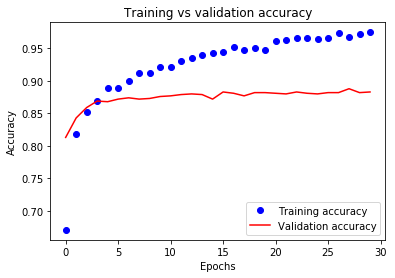

In [22]:
import matplotlib.pyplot as plt

train_acc = history.history['acc']
val_acc = history.history['val_acc']
epochs = range(len(val_acc))
plt.plot(epochs,train_acc,'bo',label="Training accuracy")
plt.plot(epochs,val_acc,'r-',label="Validation accuracy")
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Training vs validation accuracy')

Text(0.5, 1.0, 'Training vs validation loss')

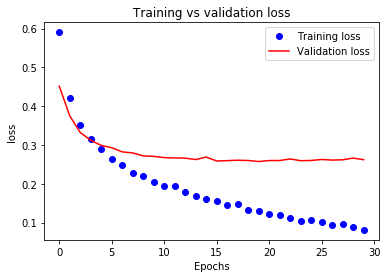

In [23]:
train_loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(len(val_loss))
plt.plot(epochs,train_loss,'bo',label="Training loss")
plt.plot(epochs,val_loss,'r-',label="Validation loss")
plt.xlabel('Epochs')
plt.ylabel('loss')
plt.legend()
plt.title('Training vs validation loss')

In [67]:
from keras.models import Sequential
from keras import layers
from keras import activations

model = Sequential()
model.add(conv_base)
model.add(layers.Flatten())
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))
model.summary()

Model: "sequential_16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Model)                (None, 4, 4, 512)         14714688  
_________________________________________________________________
flatten_12 (Flatten)         (None, 8192)              0         
_________________________________________________________________
dense_30 (Dense)             (None, 256)               2097408   
_________________________________________________________________
dense_31 (Dense)             (None, 1)                 257       
Total params: 16,812,353
Trainable params: 16,812,353
Non-trainable params: 0
_________________________________________________________________


In [68]:
#freezing the conv_base weights
print(len(model.trainable_weights))
conv_base.trainable = False
print(len(model.trainable_weights))
model.summary()

30
4
Model: "sequential_16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Model)                (None, 4, 4, 512)         14714688  
_________________________________________________________________
flatten_12 (Flatten)         (None, 8192)              0         
_________________________________________________________________
dense_30 (Dense)             (None, 256)               2097408   
_________________________________________________________________
dense_31 (Dense)             (None, 1)                 257       
Total params: 16,812,353
Trainable params: 2,097,665
Non-trainable params: 14,714,688
_________________________________________________________________


In [0]:
from keras.preprocessing.image import ImageDataGenerator
from keras import optimizers

train_datagen = ImageDataGenerator(
      rescale=1./255,
      rotation_range=40,
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True,
      fill_mode='nearest')

# Note that the validation data should not be augmented!
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        # This is the target directory
        train_dir,
        shuffle=True,
        # All images will be resized to 150x150
        target_size=(150, 150),
        batch_size=10,
        # Since we use binary_crossentropy loss, we need binary labels
        class_mode='binary')

validation_generator = test_datagen.flow_from_directory(
        validation_dir,
        target_size=(150, 150),
        batch_size=10,
        class_mode='binary')

model.compile(loss='binary_crossentropy',
              optimizer=optimizers.RMSprop(lr=2e-5),
              metrics=['acc'])

history = model.fit_generator(
      train_generator,
      steps_per_epoch=100,
      epochs=30,
      validation_data=validation_generator,
      validation_steps=50,
      verbose=2)

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.
Epoch 1/30


In [0]:
conv_base.trainable = True
set_trainable = False
for layer in conv_base.layers:
  if layer.name == 'block5_conv1':
    set_trainable = True
  if set_trainable:
    layer.trainable = True
  else:
    layer.trainable = False


In [71]:
model.compile(loss='binary_crossentropy',
              optimizer=optimizers.RMSprop(lr=1e-5),
              metrics=['acc'])

history = model.fit_generator(
      train_generator,
      steps_per_epoch=100,
      epochs=30,
      validation_data=validation_generator,
      validation_steps=50,
      verbose=2)

Epoch 1/30
 - 30s - loss: 0.5319 - acc: 0.7575 - val_loss: 0.3399 - val_acc: 0.8490
Epoch 2/30
 - 25s - loss: 0.3590 - acc: 0.8465 - val_loss: 0.2678 - val_acc: 0.8810
Epoch 3/30
 - 25s - loss: 0.3227 - acc: 0.8600 - val_loss: 0.2493 - val_acc: 0.8980
Epoch 4/30
 - 25s - loss: 0.2948 - acc: 0.8700 - val_loss: 0.2183 - val_acc: 0.9130
Epoch 5/30
 - 26s - loss: 0.2616 - acc: 0.8950 - val_loss: 0.2334 - val_acc: 0.9070
Epoch 6/30
 - 26s - loss: 0.2415 - acc: 0.8950 - val_loss: 0.2261 - val_acc: 0.9150
Epoch 7/30
 - 25s - loss: 0.2274 - acc: 0.9015 - val_loss: 0.1982 - val_acc: 0.9220
Epoch 8/30
 - 25s - loss: 0.2045 - acc: 0.9130 - val_loss: 0.1912 - val_acc: 0.9310
Epoch 9/30
 - 26s - loss: 0.2028 - acc: 0.9155 - val_loss: 0.1807 - val_acc: 0.9260
Epoch 10/30
 - 25s - loss: 0.2030 - acc: 0.9195 - val_loss: 0.1795 - val_acc: 0.9330
Epoch 11/30
 - 25s - loss: 0.2089 - acc: 0.9085 - val_loss: 0.2237 - val_acc: 0.9140
Epoch 12/30
 - 25s - loss: 0.1943 - acc: 0.9185 - val_loss: 0.2098 - val_a

Text(0.5, 1.0, 'Training vs validation accuracy')

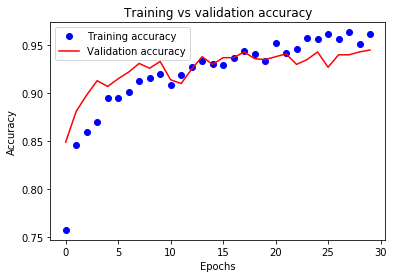

In [72]:
import matplotlib.pyplot as plt

train_acc = history.history['acc']
val_acc = history.history['val_acc']
epochs = range(len(val_acc))
plt.plot(epochs,train_acc,'bo',label="Training accuracy")
plt.plot(epochs,val_acc,'r-',label="Validation accuracy")
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Training vs validation accuracy')

Text(0.5, 1.0, 'Training vs validation loss')

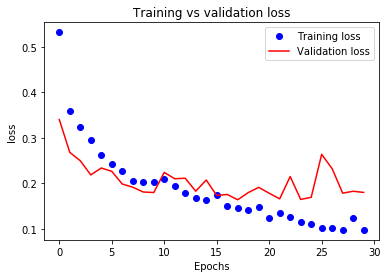

In [73]:
train_loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(len(val_loss))
plt.plot(epochs,train_loss,'bo',label="Training loss")
plt.plot(epochs,val_loss,'r-',label="Validation loss")
plt.xlabel('Epochs')
plt.ylabel('loss')
plt.legend()
plt.title('Training vs validation loss')